In [4]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


data = pd.read_csv('E:/databag/bag2/AgglomerativeClustering聚类(2到7)结果(exp非线性变化).csv',index_col=0)

data1=data.drop('4个簇',axis=1)
data1
data2=data1.drop('5个簇',axis=1)
data3=data2.drop('6个簇',axis=1)
data4=data3.drop('7个簇',axis=1)
data5=data4.drop('3个簇',axis=1)
data6=data5.drop('2个簇',axis=1)
data6

,性别,肺活量,身高(cm),体重(kg),谷丙转氨酶(ALT)(U/L),总胆红素(TBIL)(umol/L),平均血小板体积(MPV)(fl),白细胞计数(WBC)(10^9/L),中性粒细胞绝对值(NE#)(10^9/L),中性粒细胞比值(NE%)(%),...,平均红细胞血红蛋白浓度(MCHC)(g/L),红细胞分布宽度变异系数(RDW_CV)(%),血小板计数(PLT)(10^9/L),血小板分布宽度(PDW)(%),大血小板比率(P-LCR)(%),中间细胞百分比(MID%)(%),中间细胞绝对值(MID#)(10^9/L),红细胞分布宽度(RDW-SD)(%),血压-高(mmHg),血压-低(mmHg)
0,0.0,1.047610,-1.027730,-1.020618,1.025871,1.026957,-1.349859,-1.122931,-1.112442,-1.134843,...,1.238301,-1.221403,-1.021866,-1.184946,-1.336018,-1.151958,-1.171043,-1.481207,-1.012422,-1.142631
1,0.0,-1.097487,1.016547,-1.041661,1.031008,-1.030325,1.323130,-1.059684,-1.094354,-1.224751,...,1.087596,-1.265813,-1.008354,-1.274335,-1.044994,1.124202,0.000000,-1.204078,-1.012422,0.000000
2,0.0,1.047610,-1.027730,1.034599,-1.020615,-1.032013,1.173511,-1.122931,-1.140136,-1.244001,...,1.054889,-1.302500,-1.001665,-1.068939,-1.006147,1.055124,-1.054041,1.018018,1.076887,-1.016806
3,0.0,-1.149739,1.011001,1.006826,1.008598,-1.024858,1.552707,-1.164363,-1.178137,-1.285640,...,-1.316279,-1.340251,1.005004,-1.421219,1.839458,-1.004890,-1.111003,-1.243409,-1.057128,-1.016806
4,0.0,1.023528,1.016547,1.020618,1.017271,1.020255,1.040811,-1.052033,-1.008230,1.082784,...,-1.182864,-1.359535,-1.006678,1.156565,1.145605,1.045390,0.000000,1.058807,1.006192,-1.221403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,1.0,-1.123309,1.016547,1.085057,-1.023094,-1.006116,1.173511,1.172831,1.299910,1.373144,...,1.164943,-1.161834,-1.021866,1.030767,1.149441,-1.186172,-1.111003,-1.081741,1.103807,1.241930
4047,0.0,-1.321900,-1.033367,1.092464,-1.028950,-1.027630,-1.040811,-1.288686,-1.207467,-1.092395,...,1.164943,-1.014388,1.005004,-1.037033,-1.042668,-1.039796,-1.234328,-1.174349,-1.090264,1.349859
4048,0.0,-1.047610,-1.027730,1.077701,0.000000,-1.027419,-1.173511,1.288686,1.217405,1.005212,...,-1.015384,1.359535,1.253939,-1.037033,-1.162320,1.113287,1.301032,1.129109,-1.012422,1.123745
4049,0.0,-1.353002,-1.050466,-1.041661,-1.017271,-1.004717,-1.061837,-1.036896,-1.016529,-1.007130,...,1.129909,1.014388,-1.010033,-1.056060,-1.084132,-1.024190,-1.054041,1.182768,-1.218391,-1.221403


In [5]:

# 轮廓系数
silhouettes = []
#Calinski-Harabaz Index
scores = []
#Davies-Bouldin Index
davies_list = []
# 循环设置不同的聚类簇数
for i in range(4, 10):
    y_pre = np.array(data.iloc[:,23+i])
    # 轮廓系数
    silhouette = metrics.silhouette_score(data4, y_pre, metric='euclidean')
    silhouettes.append(silhouette)
    #Davies-Bouldin Index
    davies_list.append(davies_bouldin_score(data4,y_pre))
    #Calinski-Harabaz Index
    score = calinski_harabasz_score(data4,y_pre)
    scores.append(score)

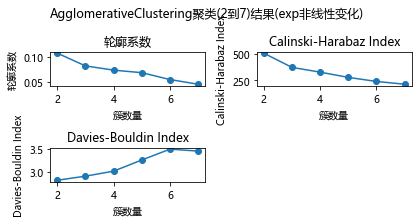

In [6]:

# 绘制轮廓系数曲线
plt.subplot(321)
plt.title('轮廓系数')
plt.plot(range(2, 8), silhouettes, marker='o')
plt.xlabel('簇数量')
plt.ylabel('轮廓系数')
# 绘制Calinski-Harabaz Index曲线
plt.subplot(322)
plt.title('Calinski-Harabaz Index')
plt.plot(range(2, 8),scores , marker='o')
plt.xlabel('簇数量')
plt.ylabel('Calinski-Harabaz Index')

# 绘制Davies-Bouldin Index曲线
plt.subplot(323)
plt.title('Davies-Bouldin Index')
plt.plot(range(2, 8),davies_list, marker='o')
plt.xlabel('簇数量')
plt.ylabel('Davies-Bouldin Index')

plt.suptitle('AgglomerativeClustering聚类(2到7)结果(exp非线性变化)')
plt.tight_layout()
plt.show()